In [3]:
import pandas as pd 
import numpy as np
import os
import tensorflow as tf



import cv2
from tensorflow import keras
from tensorflow.keras.layers import  Dense, Input, InputLayer,Flatten,Conv2D,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

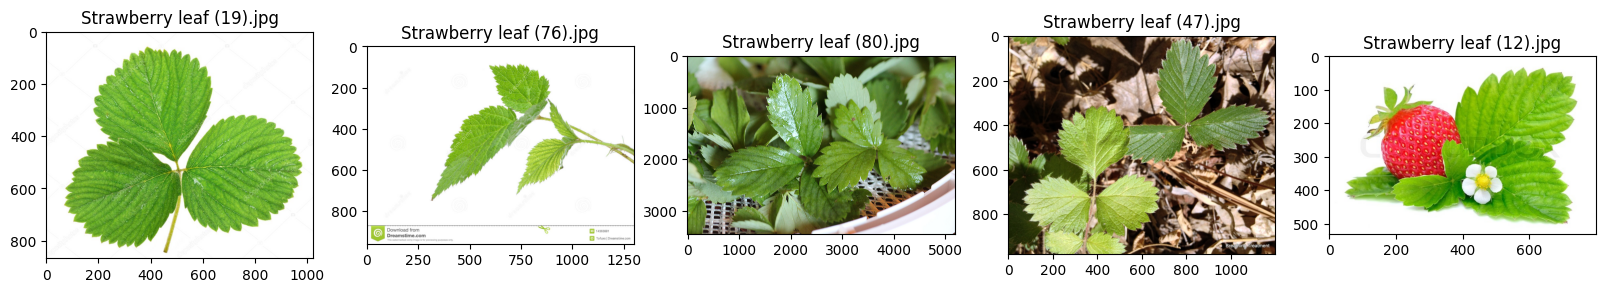

In [8]:
plt.figure(figsize=(20,20))
img_folder= r'D:\\train\\Strawberry leaf'
for i in range(5):
    file = np.random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [16]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [10]:
IMG_WIDTH= 250
IMG_HEIGHT= 250
img_folder= r'D:\\train'

In [12]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name  
img_data_array, class_name =create_dataset(r'D:\\train')

In [13]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'Apple Scab Leaf': 0,
 'Apple leaf': 1,
 'Apple rust leaf': 2,
 'Bell_pepper leaf': 3,
 'Bell_pepper leaf spot': 4,
 'Blueberry leaf': 5,
 'Cherry leaf': 6,
 'Corn Gray leaf spot': 7,
 'Corn leaf blight': 8,
 'Corn rust leaf': 9,
 'Peach leaf': 10,
 'Potato leaf early blight': 11,
 'Potato leaf late blight': 12,
 'Raspberry leaf': 13,
 'Soyabean leaf': 14,
 'Squash Powdery mildew leaf': 15,
 'Strawberry leaf': 16,
 'Tomato Early blight leaf': 17,
 'Tomato Septoria leaf spot': 18,
 'Tomato leaf': 19,
 'Tomato leaf bacterial spot': 20,
 'Tomato leaf late blight': 21,
 'Tomato leaf mosaic virus': 22,
 'Tomato leaf yellow virus': 23,
 'Tomato mold leaf': 24,
 'grape leaf': 25,
 'grape leaf black rot': 26}

In [14]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]


In [19]:
from sklearn.model_selection import train_test_split

In [18]:
from keras.utils import to_categorical

In [20]:
X_train, X_val, y_train, y_val = train_test_split(img_data_array,target_val, test_size=0.10)
num_classes = 27



In [21]:
X_train.pop(499)
y_train.pop(499)

19

In [22]:
X_Validation = np.concatenate( X_train, axis=0 )

In [24]:
Y_train = to_categorical(y_train, num_classes)
Y_val = to_categorical(y_val, num_classes)

In [25]:
X_TRAIN = np.array(X_train)
X_VAL = np.array(X_val)

In [26]:
print(X_TRAIN.shape)
print(X_VAL.shape)
print(Y_train.shape)
print(Y_val.shape)


(2081, 250, 250, 3)
(232, 250, 250, 3)
(2081, 27)
(232, 27)


In [27]:
import keras

import keras.backend as K
import tensorflow as tf
from keras.datasets import cifar10
 
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, concatenate, Flatten, Dense

def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    return output


In [29]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [30]:
import math

In [36]:
input_layer = Input(shape=(250, 250, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(27, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(27, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(27, activation='softmax', name='output')(x)

In [37]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 250, 250, 3)]        0         []                            
                                                                                                  
 conv_1_7x7/2 (Conv2D)       (None, 125, 125, 64)         9472      ['input_2[0][0]']             
                                                                                                  
 max_pool_1_3x3/2 (MaxPooli  (None, 63, 63, 64)           0         ['conv_1_7x7/2[0][0]']        
 ng2D)                                                                                            
                                                                                                  
 conv_2a_3x3/1 (Conv2D)      (None, 63, 63, 64)           4160      ['max_pool_1_3x3/2[

In [50]:
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import LearningRateScheduler

In [53]:
epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# adam= Adam(lr=initial_lrate, momentum=0.9, nesterov=False)
opt = Adam(lr=0.01, decay=1e-6)
lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer= opt, metrics=['accuracy'])

In [54]:
history = model.fit(X_TRAIN, [Y_train, Y_train, Y_train], validation_data=(X_VAL, [Y_val, Y_val, Y_val]), epochs=epochs, batch_size=256, callbacks=[lr_sc])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/25
9/9 [==============================] - 55s 6s/step - loss: 7.3994 - output_loss: 4.8946 - auxilliary_output_1_loss: 4.6670 - auxilliary_output_2_loss: 3.6826 - output_accuracy: 0.0543 - auxilliary_output_1_accuracy: 0.0644 - auxilliary_output_2_accuracy: 0.0442 - val_loss: 5.1705 - val_output_loss: 3.2309 - val_auxilliary_output_1_loss: 3.1985 - val_auxilliary_output_2_loss: 3.2669 - val_output_accuracy: 0.0517 - val_auxilliary_output_1_accuracy: 0.1078 - val_auxilliary_output_2_accuracy: 0.0431 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/25
9/9 [==============================] - 51s 6s/step - loss: 5.2604 - output_loss: 3.2879 - auxilliary_output_1_loss: 3.2566 - auxilliary_output_2_loss: 3.3184 - output_accuracy: 0.0500 - auxilliary_output_1_accuracy: 0.0745 - auxilliary_output_2_accuracy: 0.0572 - val_loss: 5.1418 - val_output_loss: 3.2068 - val_auxilliary_output_1_loss:

In [61]:
model.history.history

{'loss': [7.399448871612549,
  5.26041316986084,
  5.230185031890869,
  5.231347560882568,
  5.207462310791016,
  5.2046003341674805,
  5.203014850616455,
  5.227266788482666,
  5.219848155975342,
  5.269759178161621,
  5.273500919342041,
  5.2003679275512695,
  5.195228099822998,
  5.198685646057129,
  5.404904365539551,
  5.199267864227295,
  5.20039701461792,
  5.254391670227051,
  7.3527021408081055,
  5.685762882232666,
  6.82728910446167,
  7.603557109832764,
  5.3565778732299805,
  5.44440221786499,
  5.31687068939209],
 'output_loss': [4.8945817947387695,
  3.2879161834716797,
  3.271009683609009,
  3.275979518890381,
  3.254962205886841,
  3.2525861263275146,
  3.253002643585205,
  3.265850305557251,
  3.270285129547119,
  3.25567364692688,
  3.2518320083618164,
  3.250576972961426,
  3.2473363876342773,
  3.250699520111084,
  3.2532434463500977,
  3.2503271102905273,
  3.2524259090423584,
  3.2971811294555664,
  5.3796610832214355,
  3.4908483028411865,
  3.2505428791046143,


In [56]:
model.save('Plantdoc01.h5')

c:\Users\rosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
